In [2]:
# Cell 1: Imports & Settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn styling
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [3]:
# Cell 2: Load the data
df = pd.read_csv("dataset.csv", parse_dates=["Order Date", "Ship Date"],encoding='latin-1')
df.head(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Cell 3: Basic info & shape
print("Rows × Columns:", df.shape)
df.info()


Rows × Columns: (9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        

In [5]:
# Cell 4: Missing values & duplicates
print("Missing per column:\n", df.isna().sum())
print("\nDuplicates:", df.duplicated().sum())


Missing per column:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Duplicates: 0


In [6]:
# Cell 5: Descriptive statistics
df.describe().T


,count,mean,min,25%,50%,75%,max,std
Row ID,9994.0,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order Date,9994,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,9994,2016-05-03 23:06:58.571142912,2014-01-07 00:00:00,2015-05-27 00:00:00,2016-06-29 00:00:00,2017-05-18 00:00:00,2018-01-05 00:00:00,NaN
Postal Code,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108


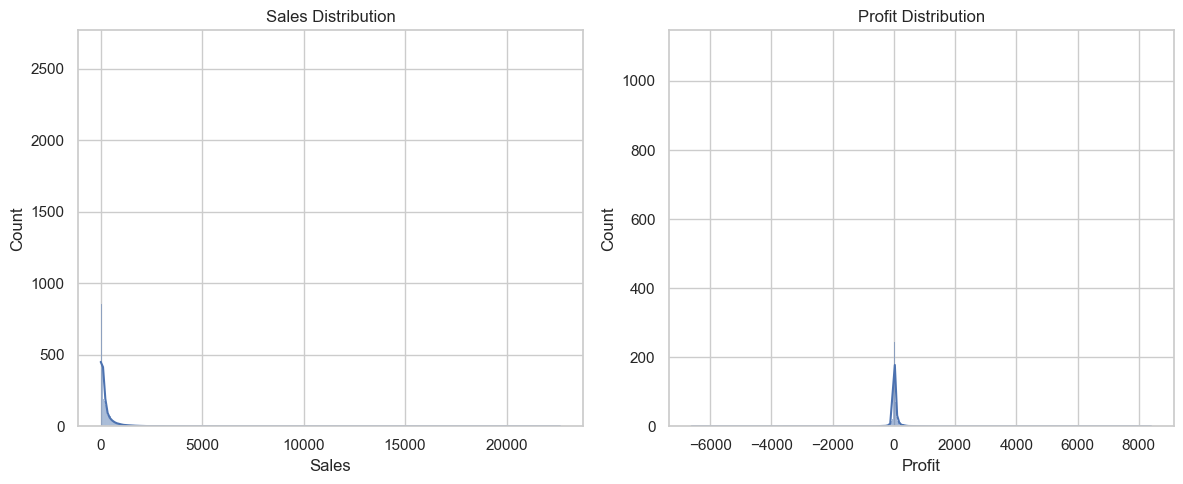

In [7]:
## 📊 Univariate Distributions
# Cell 6: Distribution of Sales & Profit
fig, axes = plt.subplots(1,2, figsize=(12, 5))
sns.histplot(df["Sales"], ax=axes[0], kde=True).set_title("Sales Distribution")
sns.histplot(df["Profit"], ax=axes[1], kde=True).set_title("Profit Distribution")
plt.tight_layout()

  

Text(0.5, 1.0, 'Profit by Category')

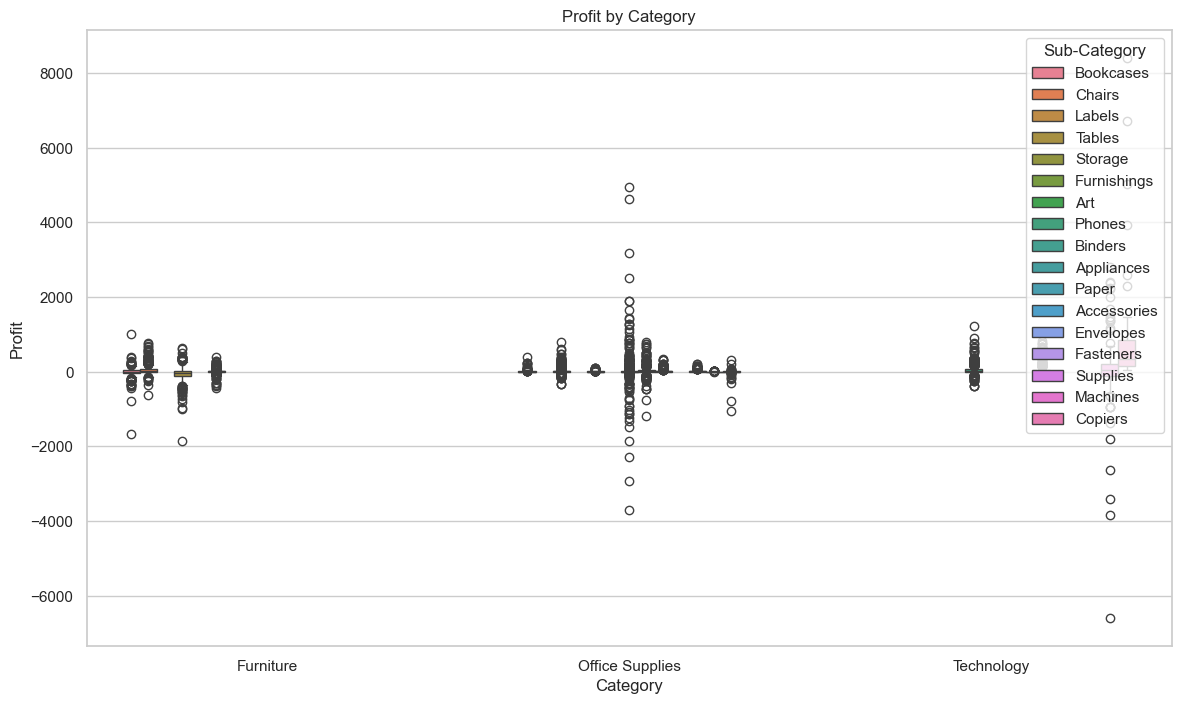

In [29]:
# Cell 7: Boxplots by Category/Sub‑Category
plt.figure(figsize=(14,8))
sns.boxplot(data=df, x="Category", y="Profit", hue="Sub-Category")
plt.title("Profit by Category")


Text(0.5, 1.0, 'Total Sales vs Profit by Region')

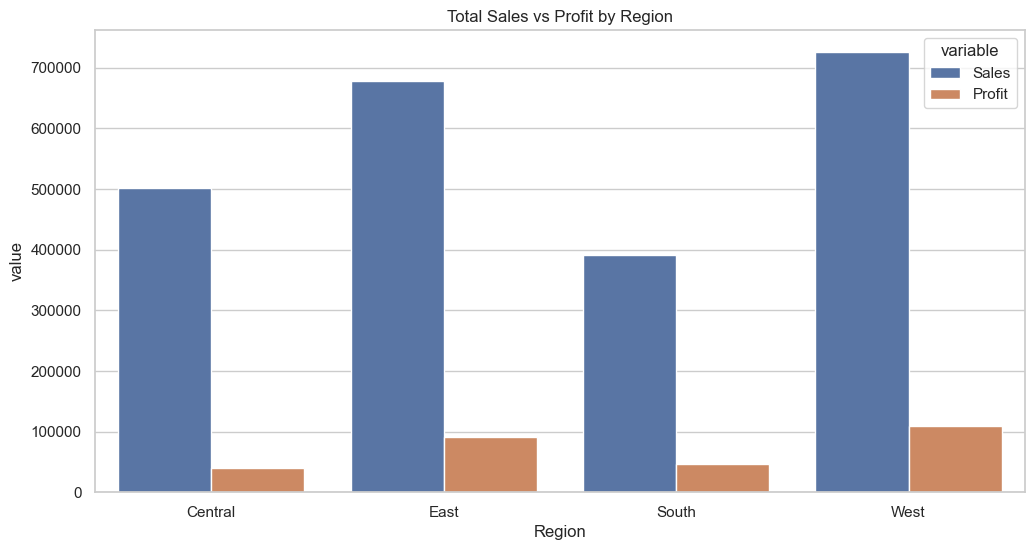

In [10]:
## 🌍 Region & Segment Analysis
# Cell 8: Total Sales & Profit by Region
region_summary = df.groupby("Region")[["Sales","Profit"]].sum().reset_index()
sns.barplot(data=region_summary.melt(id_vars="Region"), 
            x="Region", y="value", hue="variable")
plt.title("Total Sales vs Profit by Region")


Text(0.5, 1.0, 'Sales Distribution by Customer Segment')

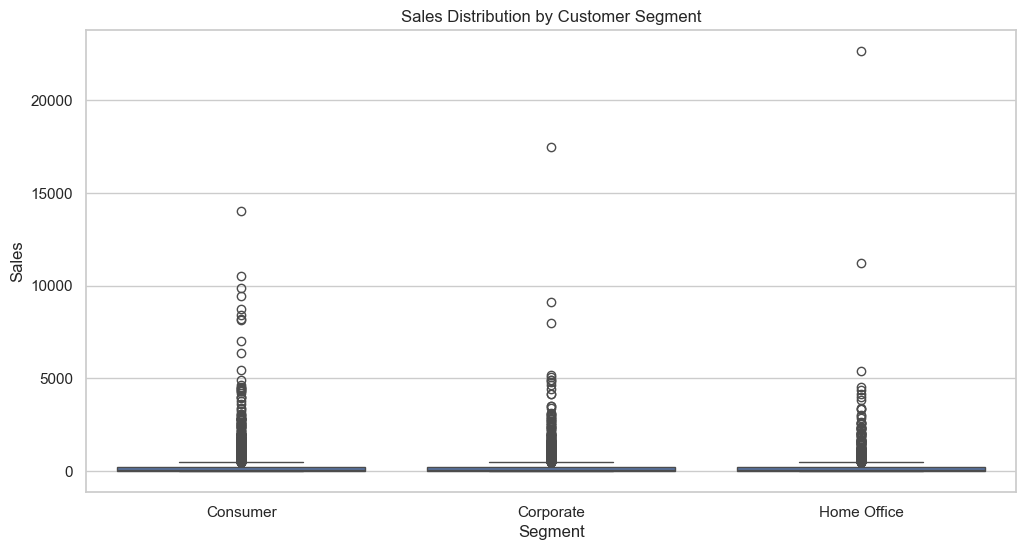

In [30]:
# Cell 9: Customer Segment comparison
sns.boxplot(data=df, x="Segment", y="Sales")
plt.title("Sales Distribution by Customer Segment")


C:\Users\hexlive63\AppData\Local\Temp\ipykernel_13360\1173023256.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_ts = df.set_index("Order Date").resample("M")[["Sales","Profit"]].sum()


Text(0.5, 1.0, 'Monthly Sales & Profit Over Time')

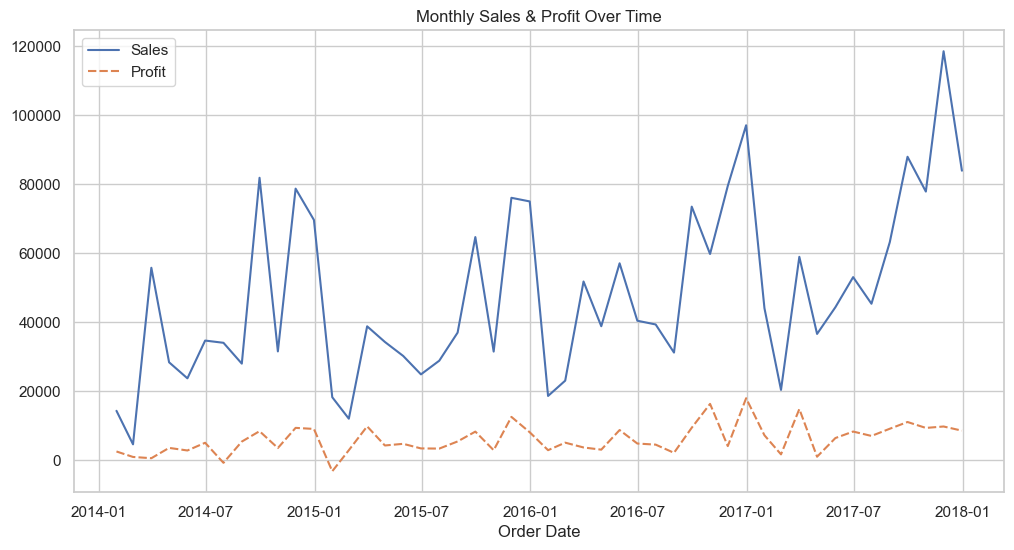

In [31]:
# Cell 10: Monthly sales trend
df_ts = df.set_index("Order Date").resample("M")[["Sales","Profit"]].sum()
sns.lineplot(data=df_ts)
plt.title("Monthly Sales & Profit Over Time")


Text(0.5, 1.0, 'Aggregate Sales by Month')

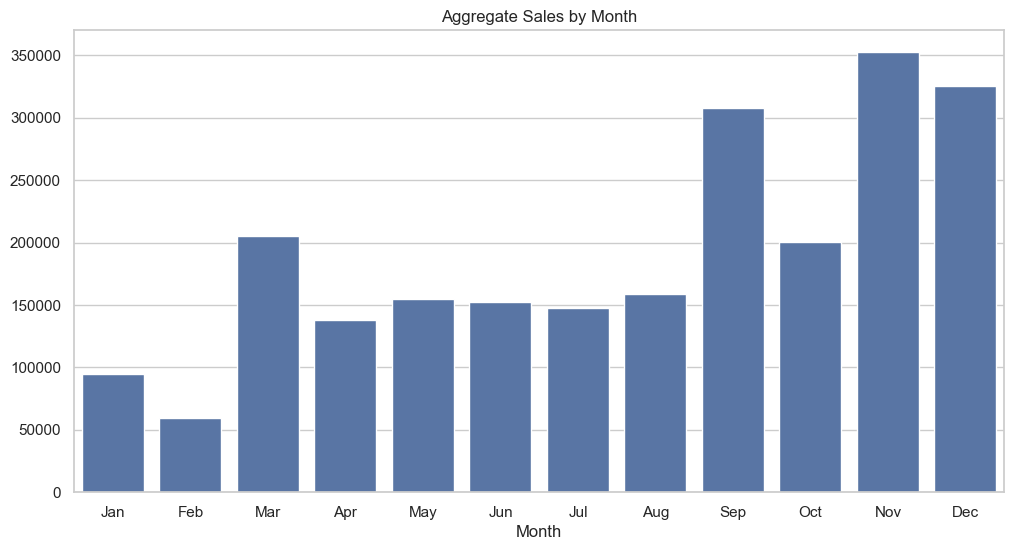

In [32]:
# Cell 11: Seasonality: Sales per Month of Year
df["Month"] = df["Order Date"].dt.month_name().str[:3]
order_month = df.groupby("Month")["Sales"].sum()
# Ensure correct month order
month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
sns.barplot(x=order_month.index, y=order_month.values, order=month_order)
plt.title("Aggregate Sales by Month")


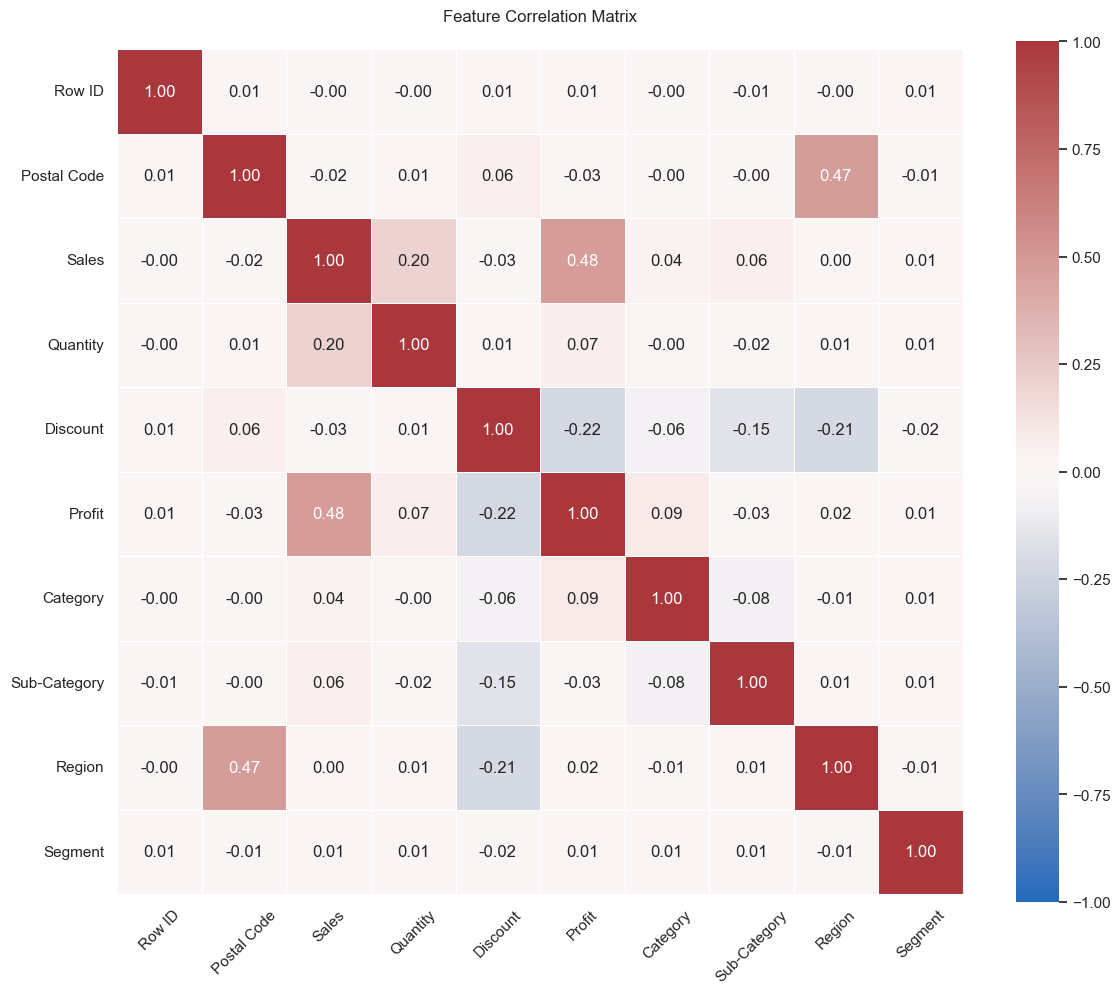

In [34]:
# Cell 12: Encode categorical for correlation
corr_df = df.select_dtypes(include=['number']).copy()  # Start with numerical columns only

# Encode categorical variables
for col in ["Category", "Sub-Category", "Region", "Segment"]:
    if col in df.columns:
        corr_df[col] = df[col].astype('category').cat.codes

# Calculate correlation matrix
correlation_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap="vlag",
            vmin=-1, 
            vmax=1,
            center=0,
            linewidths=0.5,
            square=True)
plt.title("Feature Correlation Matrix", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top 10 Products by Profit')

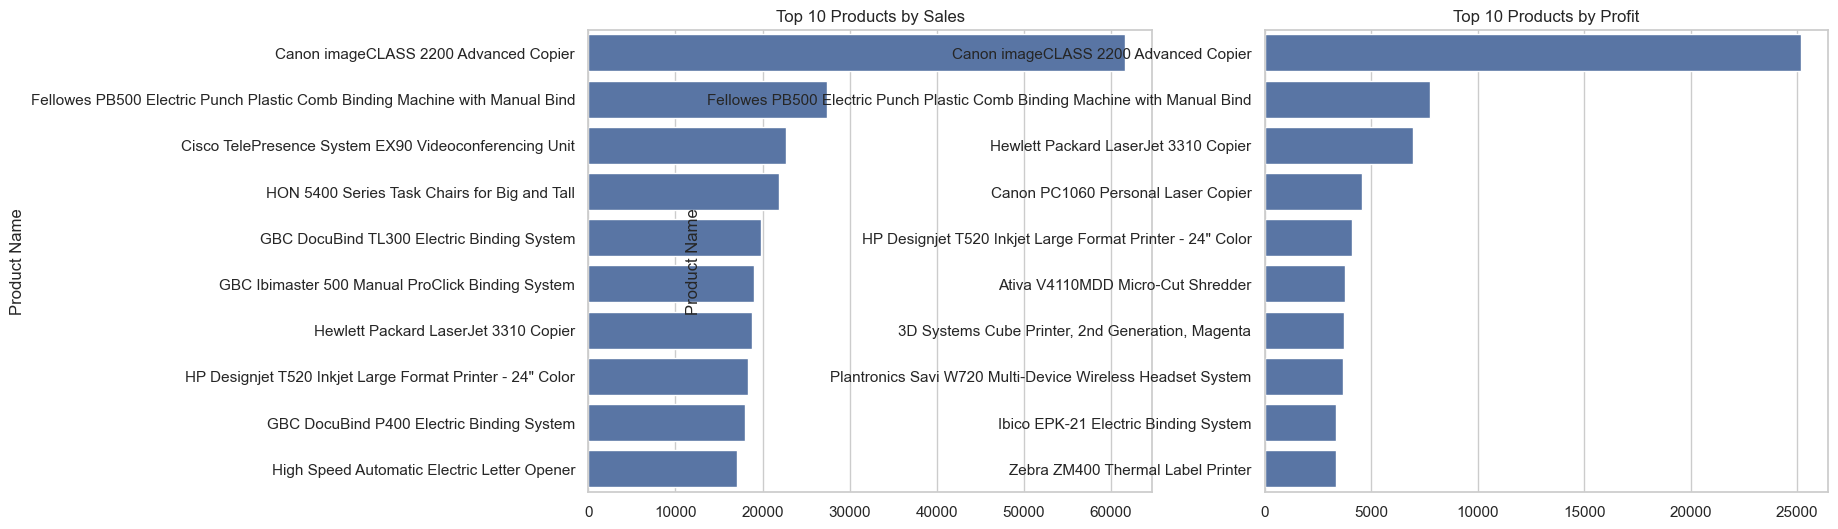

In [35]:
# Cell 13: Top 10 Products by Sales and by Profit
top_sales = df.groupby("Product Name")["Sales"].sum().nlargest(10)
top_profit = df.groupby("Product Name")["Profit"].sum().nlargest(10)

fig, axes = plt.subplots(1,2, figsize=(16,6))
sns.barplot(x=top_sales.values, y=top_sales.index, ax=axes[0]).set_title("Top 10 Products by Sales")
sns.barplot(x=top_profit.values, y=top_profit.index, ax=axes[1]).set_title("Top 10 Products by Profit")


Text(0.5, 1.0, 'Top 10 Customers by Sales')

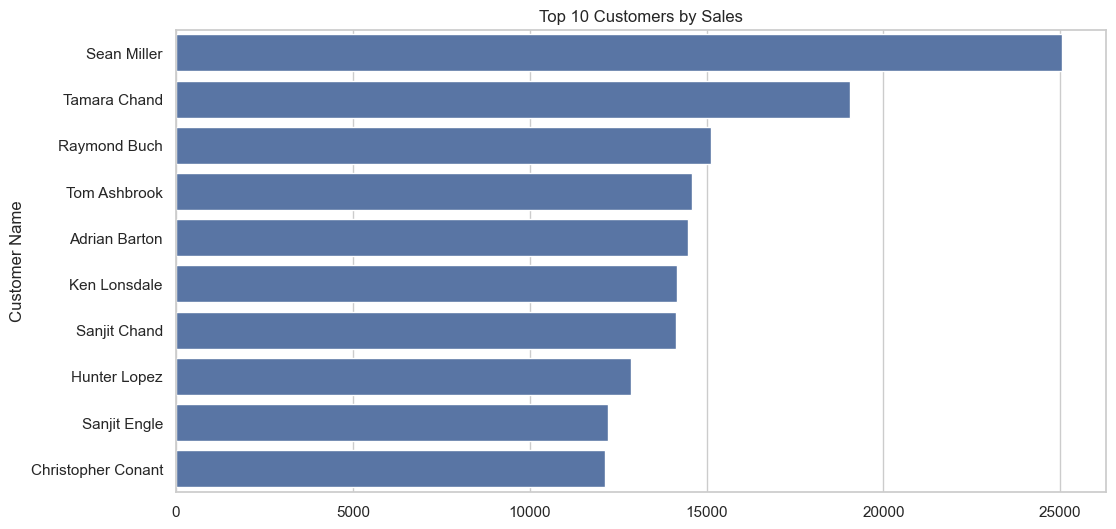

In [36]:
# Cell 14: Top customers by Sales
cust_sales = df.groupby("Customer Name")["Sales"].sum().nlargest(10)
sns.barplot(x=cust_sales.values, y=cust_sales.index)
plt.title("Top 10 Customers by Sales")


In [37]:
# Cell 15: Derive useful features
df["Order_Year"] = df["Order Date"].dt.year
df["Order_Quarter"] = df["Order Date"].dt.quarter
df["Shipping_Duration"] = (df["Ship Date"] - df["Order Date"]).dt.days
df.head(3)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Order_Year,Order_Quarter,Shipping_Duration
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,Nov,2016,4,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,Nov,2016,4,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,Jun,2016,2,4


Text(0.5, 1.0, 'Distribution of Shipping Duration (days)')

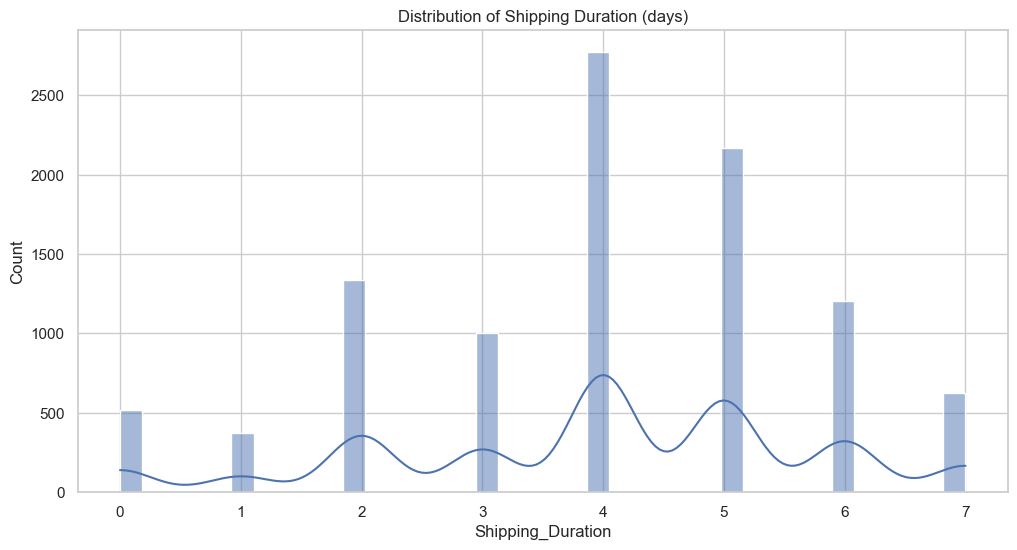

In [38]:
# Cell 16: Shipping duration distribution
sns.histplot(df["Shipping_Duration"], kde=True)
plt.title("Distribution of Shipping Duration (days)")


Text(0.5, 1.0, 'Sales vs Profit Scatter (look for outliers)')

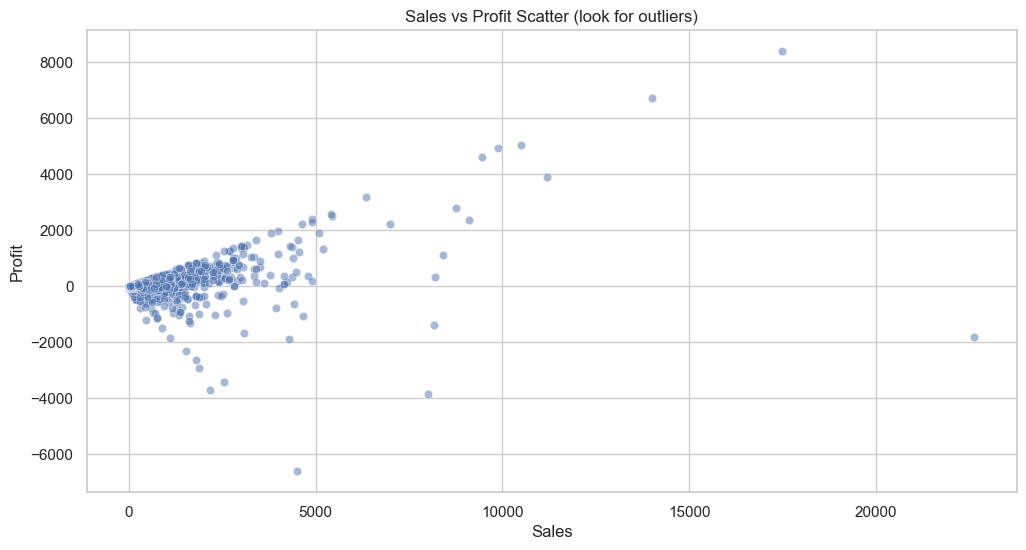

In [39]:
# Cell 17: Scatter Sales vs Profit
sns.scatterplot(data=df, x="Sales", y="Profit", alpha=0.5)
plt.title("Sales vs Profit Scatter (look for outliers)")


In [40]:
# Cell 18: Prepare X/Y, train‑test split example
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# select numeric features
features = ["Sales","Quantity","Discount","Shipping_Duration"]
X = df[features]
y = df["Profit"]

# simple split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                    test_size=0.2, random_state=42)

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Shapes:", X_train_scaled.shape, X_test_scaled.shape)


Shapes: (7995, 4) (1999, 4)
